# Kolmogorov-Smirnov Test  
Elvira Mingazova  
March, 2017  

*In this notebook the Kolmogorov-Smirnov statistical test will be explained and visualized on various examples.*  

Some definitions first:  
**Kolmogorov–Smirnov test** is a nonparametric test of the equality of continuous, one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution (one-sample K–S test), or to compare two samples (two-sample K–S test).  KS - test compares two CDFs and finds the maximal distance between the two, this value is called D-value.  
**Cumulative distribution function/ empirical distribution function (CDF)**  
An empirical distribution function is a step function that jumps up by 1/n at each of the n data points. Its value at any specified point on the x - axis is the fraction of observations that are less than or equal to the specified value. In other words CDF gives the probability accumulated up to the point at which it is evaluated (including that point).  
**Non-parametric statistics**  
It covers techniques that do not rely on data belonging to any particular distribution  
- distribution free methods, which do not rely on assumptions that the data are drawn from a given probability distribution. As such it is the opposite of parametric statistics.  
- non-parametric statistics (in the sense of a statistic over data, which is defined to be a function on a sample that has no dependency on a parameter), whose interpretation does not depend on the population fitting any parameterised distributions.  
  
**Null hypothesis**  
This is a statement, that we want to prove with our test.  
Usually it is the hypothesis that there is no significant difference between specified populations, any observed difference being due to sampling or experimental error. Example null hypothesis in our case could be: two datasets come from the same distribution. Alternative hypothesis would be: null hypothesis is not true.  
**P-value**  
The p-value is defined informally as the probability of obtaining a result equal to or "more extreme" than what was actually observed, when the null hypothesis is true.  
The p-value is widely used in null hypothesis significance testing. In this method, as part of experimental design, before performing the experiment, one first chooses a model (the null hypothesis) and a threshold value for p, called the **significance level** of the test, traditionally 5% or 1% and denoted as α. If the p-value is less than or equal to the chosen significance level (α), the null hypothesis must be rejected. However, if p-value is greater than α that does not prove that the tested hypothesis is true. For typical analysis, using the standard α = 0.05 cutoff, the null hypothesis is rejected when p < .05 and not rejected when p > .05. The p-value does not, in itself, support reasoning about the probabilities of hypotheses but is only a tool for deciding whether to reject the null hypothesis.  
**Type I error**  
Hypothesis is rejected when in fact it is true  
**Type II error**  
Hypothesis is not rejected when in fact it is false  
**General steps in hypothesis testing:**  
1. State the null hypothesis explicitly.
2. Decide on which statistic to use.
3. Decide on the desired value for α, called the significance level of the test, and
then determine the critical value for the test (usually by looking it up in a table
book).
4. Collect the data.
5. Calculate the test statistic.
6. Reject or fail to reject the null hypothesis after comparing the test statistic with
the critical value of the statistic.

With the means of the KS-test we will first compare two datasets of 20 points. Null hypothesis: there is no significant difference between the two datasets. For example we want to know whether the treatment against some disease was effective. For that reason we will create two arrays x (control group) and y (treatment group)

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from scipy.stats import ks_2samp
x=np.array([1.26, 0.34, 0.70, 1.75, 50.57, 1.55, 0.08, 0.42, 0.50, 3.20, 0.15, 0.49, 0.95, 0.24, 1.37, 0.17, 6.98, 0.10, 0.94, 0.38])
y=np.array([2.37, 2.16, 14.82, 1.73, 41.04, 0.23, 1.32, 2.91, 39.41, 0.11, 27.44, 4.51, 0.51, 4.50, 0.18, 14.68, 4.66, 1.30, 2.06, 1.19])


Let's sort the two datasets and then have a look at them

In [80]:
x.sort()
y.sort()

In [81]:
x

array([  0.08,   0.1 ,   0.15,   0.17,   0.24,   0.34,   0.38,   0.42,
         0.49,   0.5 ,   0.7 ,   0.94,   0.95,   1.26,   1.37,   1.55,
         1.75,   3.2 ,   6.98,  50.57])

In [82]:
y

array([  0.11,   0.18,   0.23,   0.51,   1.19,   1.3 ,   1.32,   1.73,
         2.06,   2.16,   2.37,   2.91,   4.5 ,   4.51,   4.66,  14.68,
        14.82,  27.44,  39.41,  41.04])

As we can see the two datasets span a similar range of values starting at ~0.1 and going up to ~50. However, the mean, median and the standard deviation vary greatly (see below).

In [83]:
meanx=np.mean(x)
stdx=np.std(x)
medianx=np.median(x)
meany=np.mean(y)
stdy=np.std(y)
mediany=np.median(y)
print meanx, stdx, medianx
print meany, stdy, mediany

3.607 10.8819433467 0.6
8.3565 12.4947890238 2.265


One of the ways to understand how these two datasets are distributed is to look at their CDFs.

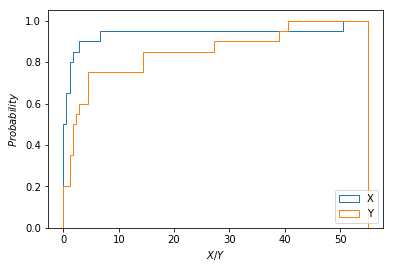

In [119]:
plt.hist(x, normed=True, cumulative=True, histtype="step", label='X', bins=np.linspace(0,55, 100))
plt.hist(y, normed=True, cumulative=True, histtype="step", label='Y', bins=np.linspace(0,55, 100))
plt.xlabel("$X/Y$")
plt.ylabel("$Probability$")
plt.legend(loc='lower right')
plt.show()

Most of the datapoints are located between 0 and 10 so it would be useful to plot the CDFs with logscaled x-axis. 

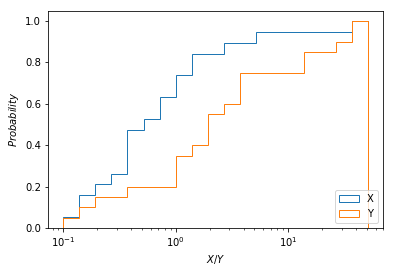

In [87]:
plt.hist(x, normed=True, cumulative=True, histtype="step", label='X', bins=np.logspace(np.log10(0.1), np.log10(51), 20))
plt.hist(y, normed=True, cumulative=True, histtype="step", label='Y', bins=np.logspace(np.log10(0.1), np.log10(51), 20))
pl.gca().set_xscale("log")
plt.xlabel("$X/Y$")
plt.ylabel("$Probability$")
plt.legend(loc='lower right')
plt.show()

Now we can compare two CDFs. By looking at them one can notice that for most any point on the x-axis, the fraction of the treatment group is strictly less than the fraction of the control group. That is, by-and-in-large the treatment values are larger than the control values for the same cumulative fraction. For example, the median (cumulative fraction =.5) for the control is clearly less than one whereas the median for the treatment is more than 1.  
The KS-test uses the maximum vertical deviation between the two curves as the statistic D. In this case the maximum deviation occurs near x=1 and has D=.45. (The fraction of the treatment group that is less then one is 0.2 (4 out of the 20 values); the fraction of the control group that is less than one is 0.65 (13 out of the 20 values). Thus the maximum difference in cumulative fraction is D=.45.)  
  
There is a very simple way to calculate the D- and the P-value in python using the scipy.stats module

In [42]:
test_stat = ks_2samp(x, y)
test_stat

Ks_2sampResult(statistic=0.45000000000000007, pvalue=0.023213275854449551)

The first value is the D-value and shows the maximum vertical deviation between two CDFs, the second value helps to make a decision whether to reject the null hypothesis or not. If we choose our significance level α = 0.05 and compare p-value with it we can see that p is smaller than α, so we can reject the null hypothesis and say that it is likely that two datasets are significantly different from each other.  
  
Now we can go back to the random model zero for the integration sites. We will compare two sample distributions of 1000 IS on chr1.

In [43]:
import sys
sys.path.insert(0, '/Users/elming/Advanced-random-IR/scripts')

In [44]:
import modelZeroModules as mzm

In [89]:
dimension_dict=mzm.getDimensionDict("../data/hg38.txt")
dimension_dict

{'chr1': 248956422,
 'chr10': 133797422,
 'chr11': 135086622,
 'chr12': 133275309,
 'chr13': 114364328,
 'chr14': 107043718,
 'chr15': 101991189,
 'chr16': 90338345,
 'chr17': 83257441,
 'chr18': 80373285,
 'chr19': 58617616,
 'chr2': 242193529,
 'chr20': 64444167,
 'chr21': 46709983,
 'chr22': 50818468,
 'chr23': 156040895,
 'chr24': 57227415,
 'chr3': 198295559,
 'chr4': 190214555,
 'chr5': 181538259,
 'chr6': 170805979,
 'chr7': 159345973,
 'chr8': 145138636,
 'chr9': 138394717}

In [90]:
import random
a = np.random.randint(1,dimension_dict["chr1"], size=1000)
b = np.random.randint(1,dimension_dict["chr1"], size=1000)
a.sort()
b.sort()
meana=np.mean(a)
stda=np.std(a)
mediana=np.median(a)
meanb=np.mean(b)
stdb=np.std(b)
medianb=np.median(b)
print meana, stda, mediana
print meanb, stdb, medianb

121719154.031 70164650.407 120397195.5
122278024.179 73237071.9008 120000909.0


In [92]:
print np.max(a), np.max(b)

248701948 248629823


In [94]:
print np.min(a), np.min(b)

35634 165364


We will plot two CDFs of a and b datasets, each of them containing 1000 random positions on a chr1

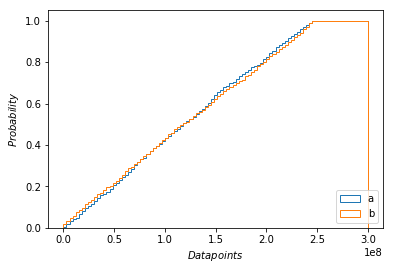

In [120]:
plt.hist(a, normed=True, cumulative=True, histtype="step",label='a', bins=np.linspace(1,300000000,100))
plt.hist(b, normed=True, cumulative=True, histtype="step",label='b', bins=np.linspace(1,300000000,100))
plt.xlabel("$Datapoints$")
plt.ylabel("$Probability$")
plt.legend(loc='lower right')
plt.show()

In [ ]:
Visually two distributions look very similar

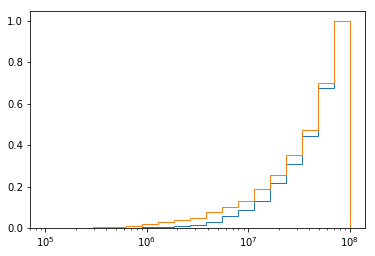

In [98]:
plt.hist(a, normed=True, cumulative=True, histtype="step", bins=np.logspace(5,8,20))
plt.hist(b, normed=True, cumulative=True, histtype="step", bins=np.logspace(5,8,20))
pl.gca().set_xscale("log")
plt.show()

In [97]:
test_stat = ks_2samp(a, b)
test_stat

Ks_2sampResult(statistic=0.029000000000000026, pvalue=0.7887807460454147)

The test statistic tells that the biggest difference between two datasets is quite a small number (0,029) and the p-value is much higher than the significance level  so there is no evidence to reject the zero hypothesis that two datasets come from the same distribution.

Sources:  
http://www.physics.csbsju.edu/stats/KS-test.html   
http://link.springer.com/book/10.1007%2F978-3-642-05158-6